.. _main_calculation_immigrant:

# Main Calculation Immigration

In order to immigrate existing CRYSTAL17 calculations,
the :py:mod:`aiida_crystal17.immigration` module has been
created to take a ``.d12`` and ``.out`` file set
and replicate a ``crystal17.main`` calculation:

.. note::

    This approach may be subject to change, 
    if a general approach is developed for immigrant calculations
    (see [this ongoing issue](https://github.com/aiidateam/aiida_core/issues/1892)).


In [1]:
from aiida import load_profile
profile = load_profile()
import os
from aiida_crystal17.tests import TEST_DIR
from aiida_crystal17.tests.utils import (
    get_or_create_local_computer, get_or_create_code, 
    get_default_metadata)
from aiida_crystal17.immigration.create_inputs import populate_builder
from aiida_crystal17.immigration.create_calcjob import create_crymain
from aiida_crystal17.common import display_json
from aiida_crystal17.graph import Graph
from aiida.orm import Code
from aiida.common.folders import Folder

:py:func:`aiida_crystal17.immigration.create_inputs.populate_builder`
will create an input builder for the `crystal17.main` calculation,
from a `FolderData` node, populated with the files, and a `Code` node.

In [2]:
computer = get_or_create_local_computer('work_directory', 'localhost')
code = get_or_create_code('crystal17.main', computer, 'mock_runcry17')

In [3]:
builder = populate_builder(
    TEST_DIR, 
    input_name=os.path.join("input_files", 'nio_sto3g_afm_opt.crystal.d12'), 
    output_name=os.path.join("output_files", 'nio_sto3g_afm_opt.crystal.out'),
    code=code, metadata=get_default_metadata())

display_json(builder)

```json
{
  "metadata": {
    "options": {
      "resources": {
        "num_machines": 1,
        "num_mpiprocs_per_machine": 1
      },
      "max_wallclock_seconds": 1800,
      "withmpi": false
    }
  },
  "basissets": {
    "Ni": [
      "uuid: a98a32f5-bbbd-478d-818b-44a89b6e48c1 (pk: 914)"
    ],
    "O": [
      "uuid: 5c31e0c9-07ca-4f80-871b-3dbbbb1986a4 (pk: 915)"
    ]
  },
  "parameters": [
    "uuid: fc0e480d-d0e7-4bbd-9f55-cf0883d2ed60 (unstored)"
  ],
  "structure": [
    "uuid: cfafaaa0-3ab6-42a1-8977-e5cf64c7182b (unstored)"
  ],
  "symmetry": [
    "uuid: 854d24ba-a582-465a-be8f-48b724760686 (unstored)"
  ],
  "kinds": [
    "uuid: 7e4c5d65-da34-422d-961f-09f7083e862b (unstored)"
  ],
  "code": [
    "Remote code 'crystal17.main-mock_runcry17@localhost' on localhost, pk:",
    "913, uuid: 02c1e8ff-5d7b-4e10-8fc9-e9b0aa8077d7"
  ]
}
```

:py:func:`aiida_crystal17.immigration.create_calcjob.create_crymain`
creates a `CalcJobNode` and uses the above function,
and the `crystal17.main` parser, to create and attach incoming and outgoing nodes,
replicating a full calculation.

In [4]:
calc_node = create_crymain(
    builder, TEST_DIR, 
    os.path.join("output_files", 'nio_sto3g_afm_opt.crystal.out'))
calc_node

<CalcJobNode: uuid: 43528483-7f74-4d34-aff9-35269d56588e (pk: 945) (aiida.calculations:crystal17.main)>

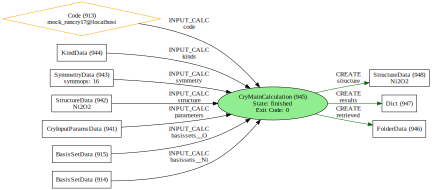

In [5]:
graph = Graph(graph_attr={'size': "6,8!", "rankdir": "LR"})
graph.add_node(calc_node)
graph.add_incoming(calc_node, annotate_links="both")
graph.add_outgoing(calc_node, annotate_links="both")
graph.graphviz

In [6]:
calc_node.attributes

{'sealed': True,
 'exit_status': 0,
 'process_state': 'finished',
 'retrieve_list': ['main.d12', 'main.out'],
 'output_main_file_name': 'main.out',
 'external_file_name': 'main.gui',
 'input_file_name': 'main.d12',
 'parser_name': 'crystal17.main',
 'append_text': '',
 'prepend_text': '',
 'environment_variables': {},
 'import_sys_environment': True,
 'mpirun_extra_params': [],
 'custom_scheduler_commands': '',
 'scheduler_stderr': '_scheduler-stderr.txt',
 'scheduler_stdout': '_scheduler-stdout.txt',
 'withmpi': False,
 'max_wallclock_seconds': 1800,
 'resources': {'num_mpiprocs_per_machine': 1, 'num_machines': 1},
 'process_label': 'CryMainCalculation'}

In [7]:
calc_node.extras

{'immigration_mod': 'aiida_crystal17.immigration.create_calcjob',
 'immigrated': True,
 '_aiida_hash': 'a9acba882771f44c66420794489621124f3e1446bd8ca6bdbb8ae8730da6b854'}